### SVM kernel trick 

![](https://miro.medium.com/v2/resize:fit:627/1*_Uhpj662QpxoIa8qlPYJ9A.png)

Blog = https://medium.com/@Suraj_Yadav/what-is-kernel-trick-in-svm-interview-questions-related-to-kernel-trick-97674401c48d

The SVM kernel trick is a powerful concept that allows Support Vector Machines (SVMs) to efficiently handle nonlinearly separable data without explicitly transforming the data into a higher-dimensional space.

Here's an explanation of the SVM kernel trick:

1. **Linear Separability Assumption**: In its basic form, SVM assumes that the data is linearly separable, meaning that there exists a hyperplane that can perfectly separate the data points of different classes.

2. **Transforming Data**: However, many real-world datasets are not linearly separable in their original feature space. The kernel trick provides a way to handle such datasets by implicitly mapping the data into a higher-dimensional space where it becomes linearly separable.

3. **Kernel Functions**: Instead of explicitly transforming the data into the higher-dimensional space, the kernel trick computes the dot product of the input vectors in the higher-dimensional space without actually performing the transformation. This is achieved through the use of kernel functions, which define the similarity between pairs of data points in the original feature space.

4. **Efficient Computation**: By using kernel functions, the SVM can compute the decision boundary and make predictions in the higher-dimensional space without explicitly storing or calculating the transformed data. This leads to significant computational savings, especially for datasets with a large number of features.

5. **Types of Kernels**: SVM supports various types of kernel functions, including:
   - Linear Kernel: $(K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i^T \cdot \mathbf{x}_j)$, equivalent to no kernel trick, used for linearly separable data.
   - Polynomial Kernel: $(K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma \cdot \mathbf{x}_i^T \cdot \mathbf{x}_j + r)^d)$, used for data with polynomial decision boundaries.
   - Radial Basis Function (RBF) Kernel: $(K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma \cdot ||\mathbf{x}_i - \mathbf{x}_j||^2))$, used for data with non-linear decision boundaries.

6. **Choosing the Kernel**: The choice of kernel function depends on the dataset and the problem at hand. Different kernels may perform better for different types of data and decision boundaries. The SVM algorithm itself remains the same; only the kernel function changes.

In summary, the SVM kernel trick allows SVMs to handle nonlinearly separable data by implicitly mapping it into a higher-dimensional space using kernel functions. This enables SVMs to capture complex patterns and make accurate predictions without the need for explicit feature transformations, leading to efficient and versatile machine learning models.

### Radial Basis Function (RBF) Kernel

![Radial Basis Function (RBF) Kernel](https://www.researchgate.net/publication/281602651/figure/fig12/AS:284558864994317@1444855528796/Example-of-Radial-Basis-Function-RBF-kernel-mapping-data-from-non-linear-separable.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

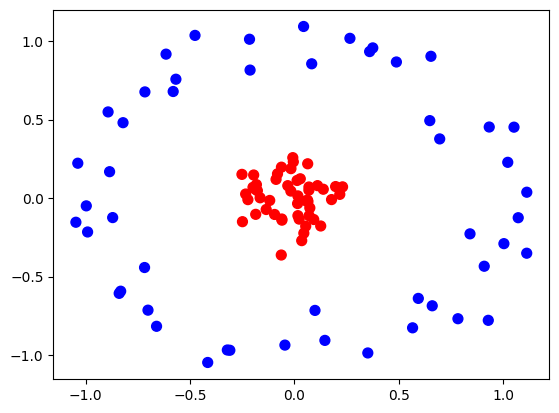

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4

In [5]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\Sher Mohammed Khan\AppData\Local\Temp\ipykernel_20976\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


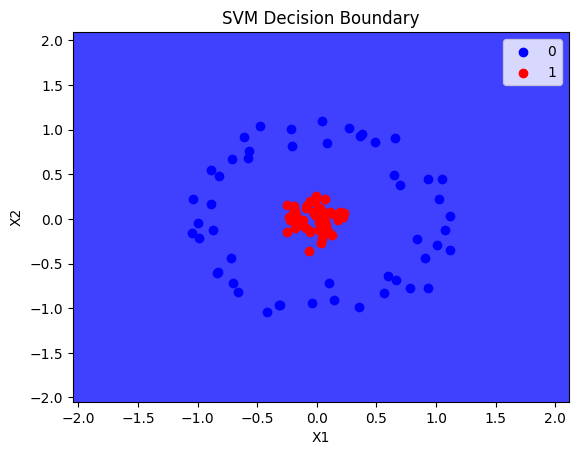

In [6]:
plot_decision_boundary(X, y, classifier)

In [7]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1)) # Radial Basis Function (RBF) Kernel
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

C:\Users\Sher Mohammed Khan\AppData\Local\Temp\ipykernel_20976\1100399693.py:4: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')


<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

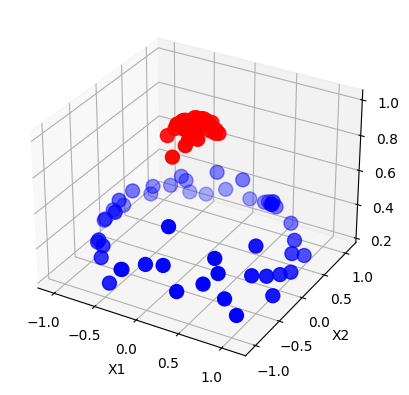

In [8]:
plot_3d_plot(X,y)

In [9]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [10]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\Sher Mohammed Khan\AppData\Local\Temp\ipykernel_20976\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


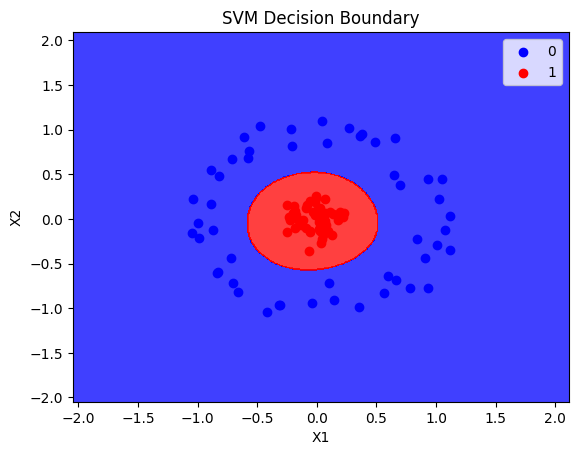

In [11]:
plot_decision_boundary(X, y, rbf_classifier)

In [12]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\Sher Mohammed Khan\AppData\Local\Temp\ipykernel_20976\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


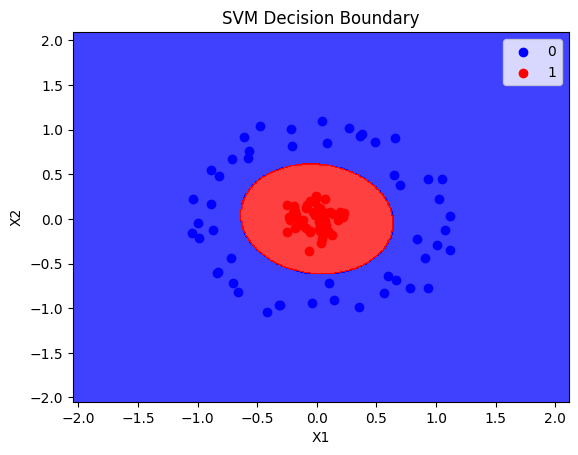

In [14]:
plot_decision_boundary(X, y, poly_classifier)

In [15]:
X

array([[ 0.0992989 , -0.71595304],
       [-0.65972023, -0.81717519],
       [ 0.91006014, -0.43455254],
       [ 0.11135811,  0.07895123],
       [ 0.05487686, -0.17938366],
       [-0.06227191, -0.36309612],
       [ 0.01750283, -0.11225754],
       [-0.83872641, -0.60723722],
       [ 0.01592953, -0.0351145 ],
       [-0.99634871, -0.04986365],
       [-1.03702476,  0.22182443],
       [ 1.05265434,  0.4515123 ],
       [ 0.07457704, -0.06299493],
       [ 0.2313306 ,  0.07125588],
       [ 1.02276534,  0.22755806],
       [ 0.13896632,  0.0560717 ],
       [ 0.02882776,  0.12264145],
       [-0.18470929, -0.10383305],
       [-0.24821263, -0.15067493],
       [-0.30866594, -0.96978793],
       [ 0.06393346, -0.01386813],
       [-0.70075041, -0.71436522],
       [-0.4146482 , -1.04767266],
       [ 0.02347348, -0.13429635],
       [-0.47549629,  1.03619703],
       [-0.01590188,  0.18721796],
       [ 1.07287366, -0.12542723],
       [-0.83162082, -0.59356204],
       [ 0.03566868,

In [16]:
np.exp(-(X**2)).sum(1)

array([1.58913124, 1.15996356, 1.2647531 , 1.98146203, 1.96532678,
       1.872612  , 1.98717101, 1.18647635, 1.99851401, 1.36808751,
       1.29313925, 1.14576575, 1.99049321, 1.94282828, 1.30085831,
       1.97773454, 1.98424093, 1.95573453, 1.91780281, 1.29956021,
       1.99572855, 1.21228762, 1.17570041, 1.9815753 , 1.13938121,
       1.96530375, 1.30069309, 1.20383559, 1.92772798, 1.94905483,
       1.23283363, 1.4401062 , 1.09440575, 1.17307516, 1.99951098,
       1.95285032, 1.25889829, 1.99014601, 1.94159827, 1.99654208,
       1.95831141, 1.95619696, 1.95702426, 1.44154738, 1.28651385,
       1.36682764, 1.97874197, 1.98235635, 1.9768443 , 1.26073978,
       1.97676165, 1.98602133, 0.96647928, 1.93589677, 1.45374811,
       1.97360196, 1.09378451, 1.4831429 , 1.99257729, 1.30082651,
       1.97836763, 1.31444465, 1.47427159, 1.28771896, 1.99284586,
       1.30441584, 1.31123348, 1.345126  , 1.11724982, 1.41800994,
       1.2964968 , 1.96705462, 1.47069571, 1.42939698, 1.95173

In [17]:
X_new=np.exp(-(X**2))

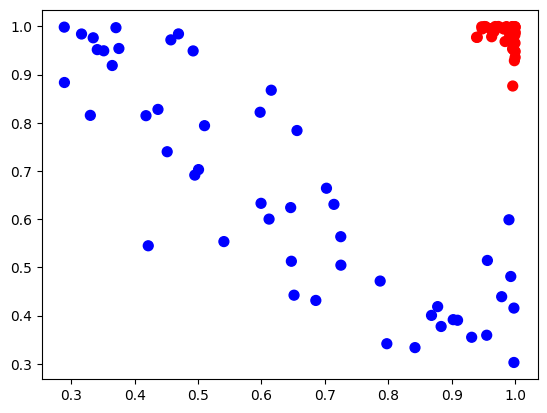

In [18]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')

### Hyperparameter

```
class sklearn.svm.SVC(*, C=1.0, 
                      kernel='rbf', 
                      degree=3, 
                      gamma='scale', 
                      coef0=0.0, 
                      shrinking=True, 
                      probability=False, 
                      tol=0.001, 
                      cache_size=200, 
                      class_weight=None, 
                      verbose=False, 
                      max_iter=-1, 
                      decision_function_shape='ovr', 
                      break_ties=False, 
                      random_state=None)
```

The `SVC` class in scikit-learn is used for Support Vector Classification, and it has several hyperparameters that can be tuned to optimize the performance of the classifier. Here's an explanation of each hyperparameter and the possible values:

1. `C`:
   - This parameter controls the regularization strength. A smaller value of `C` leads to a softer margin, allowing some misclassifications in the training data, while a larger value of `C` leads to a harder margin, aiming to classify all training data points correctly.
   - Possible values: Any positive float. Higher values of `C` correspond to less regularization.

2. `kernel`:
   - This parameter specifies the kernel type used in the algorithm. The kernel function computes the similarity between pairs of data points in the input space. Common kernel functions include:
     - `'linear'`: Linear kernel $(( K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i^T \cdot \mathbf{x}_j))$.
     - `'rbf'` (Radial Basis Function): Gaussian kernel $(( K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma \cdot ||\mathbf{x}_i - \mathbf{x}_j||^2)))$.
     - `'poly'`: Polynomial kernel $((K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma \cdot \mathbf{x}_i^T \cdot \mathbf{x}_j + r)^d))$.
     - `'sigmoid'`: Sigmoid kernel $((K(\mathbf{x}_i, \mathbf{x}_j) = \tanh(\gamma \cdot \mathbf{x}_i^T \cdot \mathbf{x}_j + r)))$.
   - Possible values: `'linear'`, `'poly'`, `'rbf'`, `'sigmoid'`.

3. `degree`:
   - This parameter is used only for the polynomial kernel (`kernel='poly'`). It specifies the degree of the polynomial kernel function.
   - Possible values: Integer value greater than or equal to 1.

4. `gamma`:
   - This parameter defines the kernel coefficient for `'rbf'`, `'poly'`, and `'sigmoid'` kernels. It controls the influence of individual training samples, with low values meaning 'far' and high values meaning 'close'.
   - Possible values: `'scale'` (default) or `'auto'` to scale with 1 / $(n_features * X.var())$.

5. `coef0`:
   - This parameter is used only for polynomial and sigmoid kernels (`kernel='poly'` or `kernel='sigmoid'`). It sets the independent term in the kernel function.
   - Possible values: Any float.

6. `shrinking`:
   - This parameter enables or disables the use of the shrinking heuristic. Shrinking heuristic helps speed up the optimization process, especially when `C` is large.
   - Possible values: `True` or `False`.

7. `probability`:
   - This parameter enables probability estimates. It must be enabled prior to calling `fit`, and it's only available for some kernels.
   - Possible values: `True` or `False`.

8. `tol`:
   - This parameter specifies the tolerance for stopping criteria.
   - Possible values: Any positive float.

9. `cache_size`:
   - This parameter specifies the size of the kernel cache (in MB).
   - Possible values: Any positive integer.

10. `class_weight`:
    - This parameter sets the weights associated with classes. It is used to handle class imbalance.
    - Possible values: `None` or dictionary with class labels as keys and corresponding weights as values.

11. `verbose`:
    - This parameter controls the verbosity of the output.
    - Possible values: `True` or `False`.

12. `max_iter`:
    - This parameter specifies the maximum number of iterations for the optimization algorithm.
    - Possible values: Integer greater than or equal to -1.

13. `decision_function_shape`:
    - This parameter determines the decision function shape when `n_classes > 2`. 
    - Possible values: `'ovr'` (one-vs-rest) or `'ovo'` (one-vs-one).

14. `break_ties`:
    - This parameter enables or disables breaking ties in `predict` and `predict_proba` methods.
    - Possible values: `True` or `False`.

15. `random_state`:
    - This parameter sets the random seed for reproducibility.
    - Possible values: `None` or integer.

These hyperparameters control various aspects of the SVM classifier's behavior and can be tuned to achieve better performance on a given dataset. The optimal values depend on the specific characteristics of the data and the problem at hand.